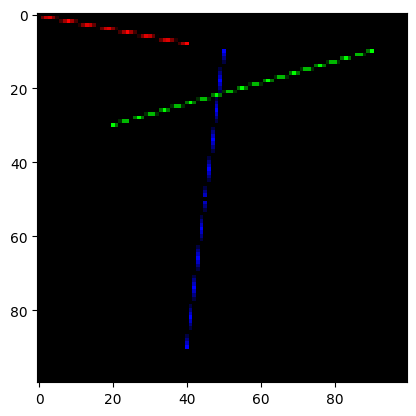

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def draw_lines(canvases: np.ndarray, start_points: np.ndarray, end_points: np.ndarray, sample_count: int):
  deltas = end_points - start_points
  directions = deltas / np.linalg.norm(deltas, axis=-1, keepdims=True)
  # ([px, py] - [ox, oy]) - [dirx, diry] * s
  # dist = (px - ox - dirx * s)^2 + (py - oy - diry * s)^2
  # dist' = 2*-dirx*(px - ox - dirx * s) + 2*-diry*(py - oy - diry * s) = 0
  # dist' = 2*dirx*(-px + ox + dirx * s) + 2*diry*(-py + oy + diry * s) = 0
  # dist' = 2*dirx*(-px + ox) + 2*dirx*(dirx * s) + 2*diry*(-py + oy) + 2*diry*(diry * s) = 0
  # dist' = 2*(dirx*dirx + diry*diry) * s = 2*dirx*(px - ox) + 2*diry*(py - oy)
  # dist' = s = (dirx*(px - ox) + diry*(py - oy)) / (dirx*dirx + diry*diry)
  # (px - ox - s * dirx)^2 + (py - oy - s * diry)^2
  for points in np.linspace(start_points, end_points, sample_count):
    discretized = points.round()
    indices = discretized.astype(np.long)
    s = ((directions * (discretized - start_points)).sum(-1) / np.square(directions).sum(-1))[:, None]
    discretized_distance_from_line = np.linalg.norm(discretized - start_points - s * directions, axis=-1)
    intensity = np.clip(0.5 - discretized_distance_from_line, min=0) * 2
    in_bounds = (indices[:, 0] >= 0) & (indices[:, 0] < canvases.shape[1]) & (indices[:, 1] >= 0) & (indices[:, 1] < canvases.shape[2])
    canvases[np.arange(canvases.shape[0])[in_bounds], indices[in_bounds, 0], indices[in_bounds, 1]] = intensity

canvases = np.zeros((3, 100, 100))
draw_lines(canvases, np.array([[0.5, 0], [30, 20], [10, 50]]), np.array([[8, 40], [10, 90], [90, 40]]), 80)
plt.imshow(np.moveaxis(canvases, 0, 2))

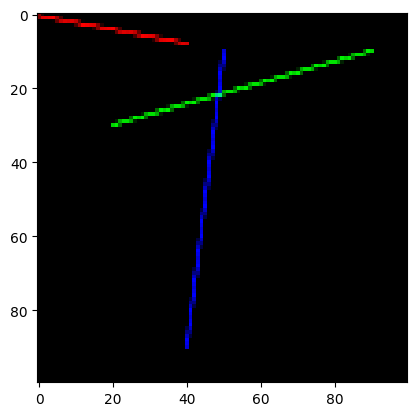

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def draw_lines(canvases: np.ndarray, start_points: np.ndarray, end_points: np.ndarray, sample_count: int, width: float, width_pass_count: int):
  deltas = end_points - start_points
  directions = deltas / np.linalg.norm(deltas, axis=-1, keepdims=True)
  counter_directions = np.stack((directions[:, 1], -directions[:, 0]), axis=-1)
  for width_pass_offset in np.linspace(counter_directions * width / 2, -counter_directions * width / 2, width_pass_count):
    offset_start_points = start_points + width_pass_offset
    offset_end_points = end_points + width_pass_offset
    for points in np.linspace(offset_start_points, offset_end_points, sample_count):
      discretized = points.round()
      indices = discretized.astype(np.long)
      in_bounds = (indices[:, 0] >= 0) & (indices[:, 0] < canvases.shape[1]) & (indices[:, 1] >= 0) & (indices[:, 1] < canvases.shape[2])

      s = ((directions * (discretized - offset_start_points)).sum(-1) / np.square(directions).sum(-1))[:, None]
      discretized_distance_from_line = np.linalg.norm(discretized - offset_start_points - s * directions, axis=-1)
      intensity = np.clip(0.5 - discretized_distance_from_line, min=0) * 2
      
      arange = np.arange(canvases.shape[0])[in_bounds]
      indices = indices[in_bounds]
      canvases[arange, indices[:, 0], indices[:, 1]] = np.maximum(intensity[in_bounds], canvases[arange, indices[:, 0], indices[:, 1]])

canvases = np.zeros((3, 100, 100))
draw_lines(canvases, np.array([[0.5, 0], [30, 20], [10, 50]]), np.array([[8, 40], [10, 90], [90, 40]]), 100, 0.5, 4)
plt.imshow(np.moveaxis(canvases, 0, 2))